In [36]:
# Import modules
import pylab
import numpy as np

In [37]:
x = np.linspace(-1,1,100)
signal = 2 + x + 2*x*x
noise  = np.random.normal(0,0.1,100)
y = signal+noise

In [46]:
x_train = x[0:80]
y_train = y[0:80]

In [47]:
train_rmse= []
test_rmse = []
degree = 80
lambda_reg_values = np.linspace(0.01,0.99,100)


In [48]:
for lambda_reg in lambda_reg_values:
    x_train = np.column_stack([np.power(x[0:80],i) for i in range(degree)])
    model = np.dot(
    np.dot(
    np.linalg.inv(
    np.dot(
    x_train.transpose(), x_train
    ) + lambda_reg * np.identity(degree)
    ), x_train.transpose()
    ),
    y_train
    )
    predicted = np.dot(model, [np.power(x,i) for i in range(degree)])
    train_rmse.append(
        np.sqrt(
            np.sum(
                np.dot(
                    y[0:80]-predicted[0:80],
                                           y_train - predicted[0:80])
                                    )
                             )
                     )
    test_rmse.append(
        np.sqrt(
        np.sum(
        np.dot(
            y[80:]-predicted[80:],
            y[80:]-predicted[80:]
        )
        )
        )
    )

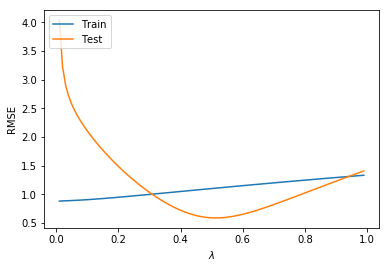

In [49]:
pylab.plot(lambda_reg_values,train_rmse)
pylab.plot(lambda_reg_values,test_rmse)
pylab.xlabel(r"$\lambda$")
pylab.ylabel("RMSE")
pylab.legend(["Train","Test"],loc=2)